# API (Aplication Program Interface)

Si buscamos "clima" en google podremos ver el clima actual y una predicción para los próximos días. Si quremos hacer una aplicación que muestra esta información, primero tenemos que tener acceso al pronostico del clima. La forma más común de acceder a estos datos es a través de una API.

En el siguiente ejemplo usamos la API de https://www.tomorrow.io/weather-api/ 

### Api Key

Normalmente cuando accedemos a una API lo hacemos usando algo llamado `API key`, una llave que nos identifica como el usuario de la API y nos da acceso a ella. Esta llave es simplemente una serie de caracteres que parecen aleatorios a simple vista. Sin una llave no podremos acceder a la API (en la mayoría de los casos). Las api keys son privadas, por lo tanto no vamos a compartir una `API key` en este notebook. 

Para obtener una key deberiamos registrarnos (de forma gratuita) en https://www.tomorrow.io/weather-api/ 

In [ ]:
import requests

# Función para cargar API desde archivo .env
def cargar_api():
    with open("../.env") as f:
        return f.read().split()[-1]

# Tucumán
latitud = "-26.808"
longitud = "-65.218"

# Cargamos la API
api_key = cargar_api()

# Creamos la URL pasandole nuestra API
url = f"https://api.tomorrow.io/v4/weather/forecast?location={latitud},{longitud}&apikey={api_key}"

# Accedemos a la api usando la librería request con el méotod get
response = requests.get(url)

# Un código 200 nos indica que el resultado fue exitoso
print(response.status_code)

200


### JSON

Cuando queremos extraer datos usando una API, generalmente la respuesta se encontrará en formato JSON.

Podemos usar la librería JSON y su función `loads()`

In [ ]:
import json 

resultado = json.loads(response.text)

### Explorando la respuesta

Cada API es diferente, y los datos se van a organizar de una forma diferente. Para entender bien como se organizan los datos podemos leer la documentación, o simplemente ponernos a explorarlos por nuestra cuenta. 

Podemos imprimir el tipo de dato, o directamente imprimir el resultado y ver que hay dentro.

In [ ]:
# Qué tipo de dato es r?
print(type(resultado))

# Veamos que hay dentro de la respuesta
print(resultado) 

<class 'dict'>
{'timelines': {'minutely': [{'time': '2024-11-15T19:29:00Z', 'values': {'cloudBase': None, 'cloudCeiling': None, 'cloudCover': 2, 'dewPoint': 10, 'freezingRainIntensity': 0, 'humidity': 20, 'precipitationProbability': 0, 'pressureSurfaceLevel': 949, 'rainIntensity': 0, 'sleetIntensity': 0, 'snowIntensity': 0, 'temperature': 36.69, 'temperatureApparent': 35.01, 'uvHealthConcern': 2, 'uvIndex': 5, 'visibility': 16, 'weatherCode': 1000, 'windDirection': 53.81, 'windGust': 8.88, 'windSpeed': 6}}, {'time': '2024-11-15T19:30:00Z', 'values': {'cloudBase': None, 'cloudCeiling': None, 'cloudCover': 2.16, 'dewPoint': 10.01, 'freezingRainIntensity': 0, 'humidity': 20, 'precipitationProbability': 0, 'pressureSurfaceLevel': 948.96, 'rainIntensity': 0, 'sleetIntensity': 0, 'snowIntensity': 0, 'temperature': 36.68, 'temperatureApparent': 35, 'uvHealthConcern': 1, 'uvIndex': 2, 'visibility': 16, 'weatherCode': 1000, 'windDirection': 53.81, 'windGust': 8.86, 'windSpeed': 5.99}}, {'time':

In [ ]:
# r es un diccionario con dos llaves "timelines" y "location"
print(resultado.keys())

# Podemos ver que hay tres tipos de dato dentro de "timelines" (por minuto, por hora y por día)
print(resultado["timelines"].keys())

dict_keys(['timelines', 'location'])
dict_keys(['minutely', 'hourly', 'daily'])


In [ ]:
# Dentro de los datos por hora tenemos una lista con 120 elementos
type(resultado["timelines"]["hourly"]), len(resultado["timelines"]["hourly"])

(list, 120)

In [ ]:
# Exploremos el primer elemento
resultado["timelines"]["hourly"][0]

{'time': '2024-11-15T19:00:00Z',
 'values': {'cloudBase': None,
  'cloudCeiling': None,
  'cloudCover': 2,
  'dewPoint': 13.13,
  'evapotranspiration': 0.695,
  'freezingRainIntensity': 0,
  'humidity': 26,
  'iceAccumulation': 0,
  'iceAccumulationLwe': 0,
  'precipitationProbability': 0,
  'pressureSurfaceLevel': 950.22,
  'rainAccumulation': 0,
  'rainAccumulationLwe': 0,
  'rainIntensity': 0,
  'sleetAccumulation': 0,
  'sleetAccumulationLwe': 0,
  'sleetIntensity': 0,
  'snowAccumulation': 0,
  'snowAccumulationLwe': 0,
  'snowIntensity': 0,
  'temperature': 35.19,
  'temperatureApparent': 34.16,
  'uvHealthConcern': 2,
  'uvIndex': 5,
  'visibility': 11.05,
  'weatherCode': 1000,
  'windDirection': 269.69,
  'windGust': 8.63,
  'windSpeed': 0}}

### Accediendo a los datos por hora

A continuación creamos un diccionario para guardar tres datos por hora (la fecha, la temperatura y las probabilidades de lluvia).

In [ ]:
datos = {"fecha" : [], "temperatura" : [], "probabilidad_lluvia" : []}

for hora in resultado["timelines"]["hourly"]:
    datos["fecha"].append(hora["time"])
    datos["temperatura"].append(hora["values"]["temperature"])
    datos["probabilidad_lluvia"].append(hora["values"]["precipitationProbability"])

In [ ]:
resultado["timelines"]["hourly"][0]

{'time': '2024-11-15T18:00:00Z',
 'values': {'cloudBase': None,
  'cloudCeiling': None,
  'cloudCover': 2,
  'dewPoint': 12.13,
  'evapotranspiration': 0.667,
  'freezingRainIntensity': 0,
  'humidity': 26,
  'iceAccumulation': 0,
  'iceAccumulationLwe': 0,
  'precipitationProbability': 0,
  'pressureSurfaceLevel': 951.33,
  'rainAccumulation': 0,
  'rainAccumulationLwe': 0,
  'rainIntensity': 0,
  'sleetAccumulation': 0,
  'sleetAccumulationLwe': 0,
  'sleetIntensity': 0,
  'snowAccumulation': 0,
  'snowAccumulationLwe': 0,
  'snowIntensity': 0,
  'temperature': 34.19,
  'temperatureApparent': 32.89,
  'uvHealthConcern': 3,
  'uvIndex': 9,
  'visibility': 11.05,
  'weatherCode': 1000,
  'windDirection': 58.19,
  'windGust': 7,
  'windSpeed': 0}}

<Axes: xlabel='fecha'>

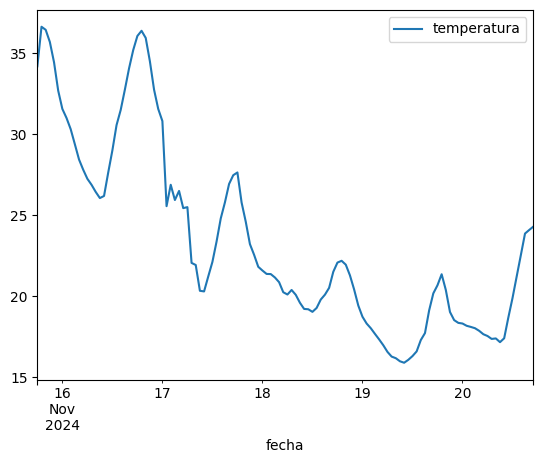

In [82]:
import matplotlib.pyplot as plt
import pandas as pd 

# Creo un pandas DataFrame a partir de un diccionario
df = pd.DataFrame(datos)
# Interpreto la fecha como fecha
df.fecha = pd.to_datetime(df.fecha)
df.set_index("fecha", inplace=True)

# Grafico el pronostico del clima
df.plot(y="temperatura")

<Axes: xlabel='fecha'>

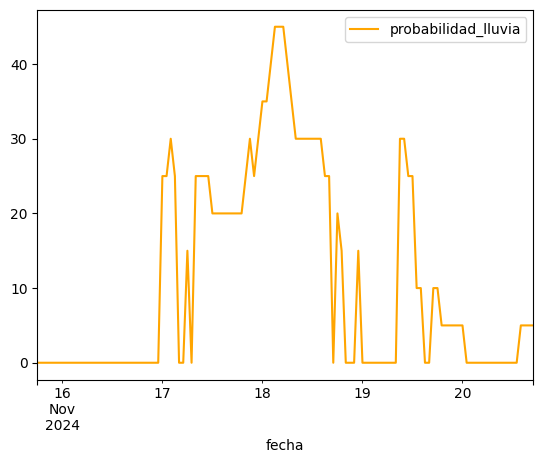

In [84]:
df.plot(y="probabilidad_lluvia", c="orange")